In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hosammhmdali/supermarket-sales")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/hosammhmdali/supermarket-sales/versions/1


Mean: 322.966749, Standard Deviation: 245.88533510097207


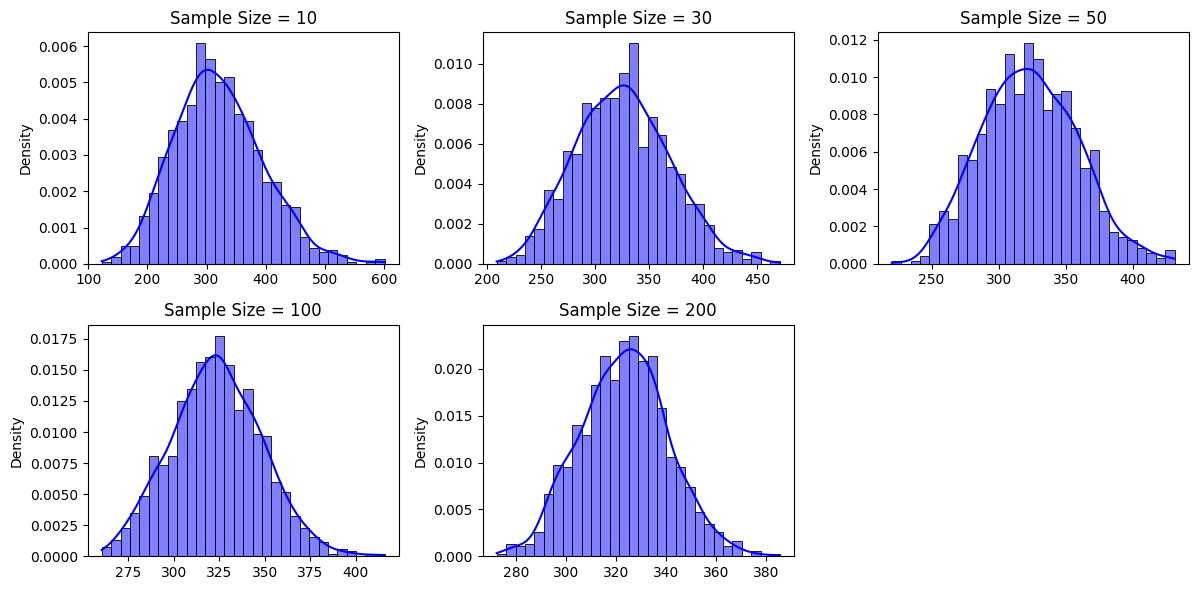

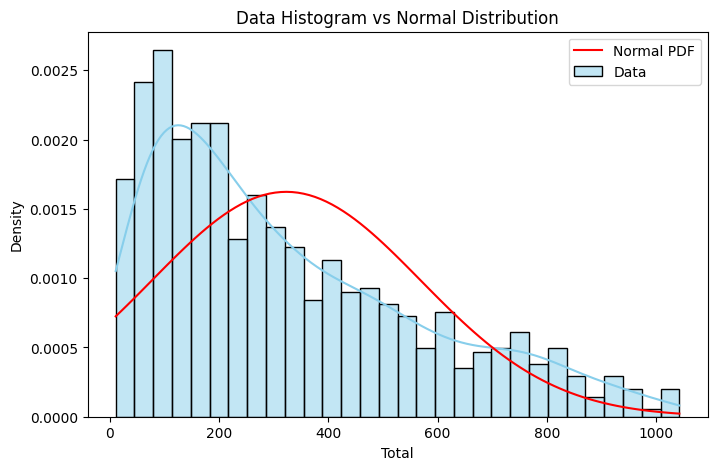

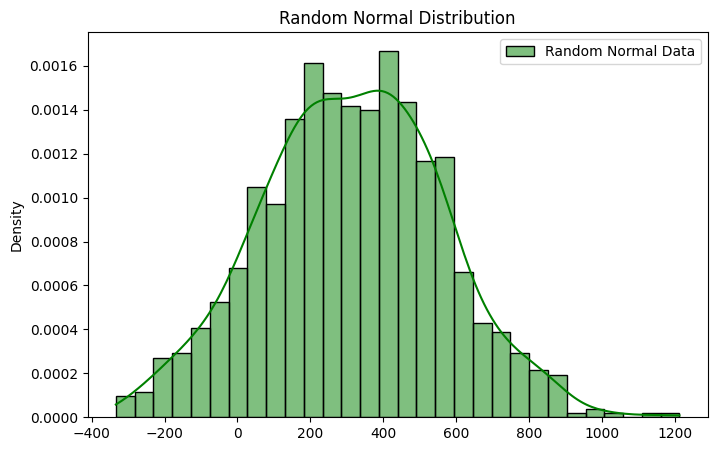

Probability that a value is below the mean: 0.5
95th percentile value: 727.412134255012


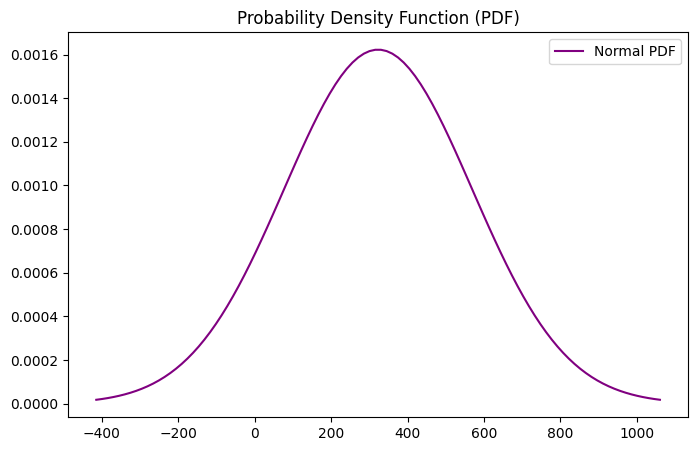

Original Skewness: 0.8912303920037631, Kurtosis: -0.08746991289329031
Sample Size: 10 -> Skewness: 0.27785519284393645, Kurtosis: -0.07605065737611971
Sample Size: 30 -> Skewness: 0.1745381660911354, Kurtosis: 0.2079577734547131
Sample Size: 50 -> Skewness: 0.26487324835939036, Kurtosis: 0.08198710124948905
Sample Size: 100 -> Skewness: 0.17149268297268994, Kurtosis: -0.025818289783233528
Sample Size: 200 -> Skewness: 0.13855477050097478, Kurtosis: 0.019281760544302973
99th percentile value: 894.981575569966


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

# Load dataset
df = pd.read_csv("/content/archive (9).zip")

# Select a numerical column (e.g., 'Total')
column = 'Total'
data = df[column]

# Compute summary statistics
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # Sample standard deviation

print(f"Mean: {mean}, Standard Deviation: {std_dev}")

# Histogram of sample means (CLT verification)
sample_sizes = [10, 30, 50, 100, 200]
plt.figure(figsize=(12, 6))

for i, size in enumerate(sample_sizes, 1):
    sample_means = [np.mean(np.random.choice(data, size, replace=True)) for _ in range(1000)]
    plt.subplot(2, 3, i)
    sns.histplot(sample_means, kde=True, bins=30, stat="density", color="blue")
    plt.title(f"Sample Size = {size}")

plt.tight_layout()
plt.show()

# Original Data Histogram vs Normal Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, bins=30, stat="density", color="skyblue", label="Data")
x_values = np.linspace(min(data), max(data), 100)
plt.plot(x_values, norm.pdf(x_values, mean, std_dev), color='red', label="Normal PDF")
plt.legend()
plt.title("Data Histogram vs Normal Distribution")
plt.show()

# Generate 1000 random normal numbers with dataset mean & std deviation
random_samples = np.random.normal(mean, std_dev, 1000)
plt.figure(figsize=(8, 5))
sns.histplot(random_samples, kde=True, bins=30, stat="density", color="green", label="Random Normal Data")
plt.legend()
plt.title("Random Normal Distribution")
plt.show()

# Compute cumulative probability (CDF) for mean
probability = norm.cdf(mean, loc=mean, scale=std_dev)
print(f"Probability that a value is below the mean: {probability}")

# Compute the 95th percentile (Quantiles)
percentile_95 = norm.ppf(0.95, loc=mean, scale=std_dev)
print(f"95th percentile value: {percentile_95}")

# Compute & plot PDF for different values
x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
pdf_values = norm.pdf(x_values, mean, std_dev)
plt.figure(figsize=(8, 5))
plt.plot(x_values, pdf_values, color='purple', label="Normal PDF")
plt.title("Probability Density Function (PDF)")
plt.legend()
plt.show()

# Compute skewness and kurtosis
original_skew = skew(data)
original_kurt = kurtosis(data)
print(f"Original Skewness: {original_skew}, Kurtosis: {original_kurt}")

# Skewness and Kurtosis for sample means
for size in sample_sizes:
    sample_means = [np.mean(np.random.choice(data, size, replace=True)) for _ in range(1000)]
    print(f"Sample Size: {size} -> Skewness: {skew(sample_means)}, Kurtosis: {kurtosis(sample_means)}")

# Compute the z-score for the 99th percentile
z_score_99th = norm.ppf(0.99, loc=mean, scale=std_dev)
print(f"99th percentile value: {z_score_99th}")
